In [1]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib.path import Path
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.signal import savgol_filter
from math import atan2
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import numpy.linalg as LA


%matplotlib inline
#from google.colab import drive
#drive.mount('/content/drive')

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['pdf.fonttype']=42
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 11

fig_path = 'C:/Users/LAB-JJ/Desktop/code/figs/'

c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [ ]:
ppk_pulse  = pd.read_csv('.../ppk_pulse_all_data.csv')
sn_grouped = ppk_pulse.groupby(['ts', 'genotype', 'trial', 'fly'])['vel'].mean().reset_index()

In [ ]:
fig = plt.figure(figsize=(5,1))
ax = sns.lineplot(data=sn_grouped[sn_grouped.trial=='10_100msec_400msec'], x='ts', y='vel', hue='genotype')

for t in np.arange(10, 15, 0.5):
    plt.axvspan(t, t + 0.1, color='red', alpha=0.2)

plt.xticks(np.arange(0,26,2))
plt.yticks(np.arange(0,41,20))
plt.ylabel('Velocity \n (mm/s)')
plt.xlabel('Time (s)')

ax.tick_params(axis="y", direction='in', length=4)
ax.tick_params(axis="x", direction='in', length=4)

sns.despine(offset=4, trim=True)

In [ ]:
fig = plt.figure(figsize=(5,1))

ax = sns.lineplot(data=sn_grouped[sn_grouped.trial=='10_500msec_1500msec'], x='ts', y='vel', hue='genotype')

for t in np.arange(10, 30, 2):
    plt.axvspan(t, t + 0.5, color='red', alpha=0.2)

plt.xticks(np.arange(0,41,4))
plt.yticks(np.arange(0,41,20))
plt.ylabel('Velocity \n (mm/s)')
plt.xlabel('Time (s)')

ax.tick_params(axis="y", direction='in', length=4)
ax.tick_params(axis="x", direction='in', length=4)

sns.despine(offset=4, trim=True)

In [ ]:

fig = plt.figure(figsize=(5,1))
ax = sns.lineplot(data=sn_grouped[sn_grouped.trial=='3_30sec_10sec'], x='ts', y='vel', hue='genotype')

for t in np.arange(10, 130, 40):
    plt.axvspan(t, t + 30, color='red', alpha=0.2)

plt.xticks(np.arange(0,141,10))
plt.yticks(np.arange(0,41,20))
plt.ylabel('Velocity \n (mm/s)')
plt.xlabel('Time (s)')

ax.tick_params(axis="y", direction='in', length=4)
ax.tick_params(axis="x", direction='in', length=4)

sns.despine(offset=4, trim=True)

In [ ]:

data = pd.read_csv('.../ppk_data.csv')
df = data.copy()

C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_8160\2297256794.py:2: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(P + 'all_screen_compiled_ppk_split.csv')


In [3]:
#try this to correct code:

# Step 1: Get bounds
x_min, x_max = df['x_mm'].min(), df['x_mm'].max()
y_min, y_max = df['y_mm'].min(), df['y_mm'].max()

# Print for checking
print(f"x: {x_min:.2f} → {x_max:.2f}, y: {y_min:.2f} → {y_max:.2f}")

# Step 2: Normalize to 0–100 mm range
df['x_norm'] = (df['x_mm'] - x_min) / (x_max - x_min) * 100
df['y_norm'] = (df['y_mm'] - y_min) / (y_max - y_min) * 100




x: 14.78 → 105.36, y: 7.67 → 97.60


In [4]:
# Compute distance from center
df['r'] = np.sqrt((df['x_norm'] - 50)**2 + (df['y_norm'] - 50)**2)

# Define regions based on distance to center
df['arena_region'] = np.where(df['r'] <= 30, 'center', 'surround')


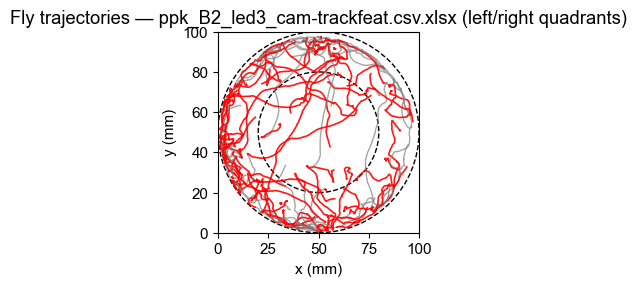

In [6]:

file_of_interest = 'ppk_B2_led3_cam-trackfeat.csv.xlsx' # <-- replace with your file
subset = df[
    (df['file_path'] == file_of_interest) &
   # (df['opto'].isin(['left', 'right'])) &
    (df['ts'] >= 25) & (df['ts'] <= 33)
]

# ✅ Set up plot
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_aspect('equal')
ax.set_title(f"Fly trajectories — {file_of_interest} (left/right quadrants)")
ax.set_xlabel("x (mm)")
ax.set_ylabel("y (mm)")
ax.set_xlim(0, 100)  # adjust to your arena limits
ax.set_ylim(0, 100)

# ✅ Plot fly trajectories with color split
for fly_id, fly_data in subset.groupby('fly'):
    fly_data = fly_data.sort_values('ts')

    # Split into pre and post
    pre = fly_data[(fly_data['ts'] >= 25) & (fly_data['ts'] < 30)]
    post = fly_data[(fly_data['ts'] >= 30) & (fly_data['ts'] <= 33)]

    if len(pre) > 1:
        ax.plot(pre['x_norm'], pre['y_norm'], color='gray', alpha=0.7, linewidth=1)

    if len(post) > 1:
        ax.plot(post['x_norm'], post['y_norm'], color='red', alpha=0.9, linewidth=1.2)

# ✅ Optional: draw arena circles
outer_circle = plt.Circle((50, 50), 50, color='black', fill=False, linestyle='--')
inner_circle = plt.Circle((50, 50), 30, color='black', fill=False, linestyle='--')
ax.add_patch(outer_circle)
ax.add_patch(inner_circle)

plt.tight_layout()
plt.show()


In [45]:
fig.savefig(fig_path + 'fly_movement_raw_pre_post.svg', bbox_inches='tight', dpi=600, transparent=True)

the above: It strongly suggests a behavioral shift in the center region from random/multidirectional movement to biased directional movement after the event at ts=30.

| Time Window | Behavior (Center Region)            |
| ----------- | ----------------------------------- |
| Pre         | Mixed movement; small diagonal bias |
| Post        | Strong bias toward left (West)      |


In [ ]:

# --- Incremental direction vectors ---
def compute_sliding_vectors(group, window_start, window_end, step=0.1):
    sub = group[(group['ts'] >= window_start) & (group['ts'] <= window_end)].sort_values('ts')
    vectors = []
    for i in range(len(sub) - 1):
        t1, t2 = sub.iloc[i]['ts'], sub.iloc[i + 1]['ts']
        if t2 - t1 <= step:
            x1, y1 = sub.iloc[i][['x_norm', 'y_norm']]
            x2, y2 = sub.iloc[i + 1][['x_norm', 'y_norm']]
            dx, dy = x2 - x1, y2 - y1
            angle = np.arctan2(dy, dx)
            mag = np.sqrt(dx ** 2 + dy ** 2)
            vectors.append({'angle': angle, 'magnitude': mag})
    return vectors

# --- Consistency of movement (net magnitude / total distance) ---
def compute_consistency(group, window_start, window_end):
    '''A consistency score: 
    near 1 means straight movement, 
    near 0 means lots of turning or sporadic movement.
    '''

    sub = group[(group['ts'] >= window_start) & (group['ts'] <= window_end)].sort_values('ts')
    if len(sub) < 2:
        return np.nan
    total_dist = np.sum(np.sqrt(np.diff(sub['x_norm'])**2 + np.diff(sub['y_norm'])**2))
    net_vec = sub.iloc[-1][['x_norm', 'y_norm']].values - sub.iloc[0][['x_norm', 'y_norm']].values
    net_mag = np.linalg.norm(net_vec)
    return net_mag / total_dist if total_dist > 0 else 0

# --- Rose (polar histogram) plot ---
def rose_plot(angles, ax, bins=32, weights=None, title="Rose Plot"):
    bin_edges = np.linspace(-np.pi, np.pi, bins + 1)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    counts, _ = np.histogram(angles, bins=bin_edges, weights=weights)
    ax.bar(bin_centers, counts, width=(2 * np.pi / bins), bottom=0.0, alpha=0.7, edgecolor='black')
    ax.set_title(title)
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)

# --- Example usage with one fly's post-window movement ---
example_fly = df[df['fly'] == "fly2"]
post_vectors = compute_sliding_vectors(example_fly, 30, 32)
consistency_score = compute_consistency(example_fly, 30, 32)



print(f"Consistency score (net/total distance): {consistency_score:.3f}")

# Store all results
all_vectors = []
consistency_results = []

# Group by file and fly
grouped = df.groupby(['file_path', 'fly'])

# Analyze each fly in each region
for (trial, fly), group in grouped:
    for region in ['center', 'surround']:
        sub = group[group['arena_region'] == region]
        sub = sub[sub.opto.isin(['left', 'right'])]  # Only consider opto trials
        if sub.empty:
            continue

        # Analyze both pre and post windows
        for period, start, end in [('pre', 28, 30), ('post', 30, 32)]:
            window = sub[(sub['ts'] >= start) & (sub['ts'] <= end)]
            if len(window) < 2:
                continue

            # --- Incremental vectors ---
            vectors = compute_sliding_vectors(window, start, end)
            for v in vectors:
                all_vectors.append({
                    'file': trial,
                    'fly': fly,
                    'arena_region': region,
                    'period': period,
                    'angle': v['angle'],
                    'magnitude': v['magnitude']
                })

            # --- Consistency metric ---
            consistency = compute_consistency(window, start, end)
            consistency_results.append({
                'file': trial,
                'fly': fly,
                'arena_region': region,
                'period': period,
                'consistency': consistency
            })

# Create DataFrames
vectors_df = pd.DataFrame(all_vectors)
consistency_df = pd.DataFrame(consistency_results)

"""
High consistency (~1): Fly moved in a straight line

Low consistency (<0.5): Fly turned often
"""


'\nHigh consistency (~1): Fly moved in a straight line\n\nLow consistency (<0.5): Fly turned often\n'

C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_8160\4108366858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass 

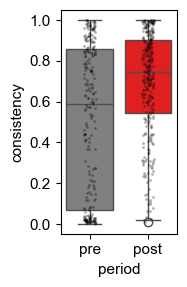

In [13]:
# Make sure consistency_df is available and clean
consistency_df = consistency_df.dropna()

# Plot: Straightness (consistency) by region and period
fig = plt.figure(figsize=(2, 3))
sns.boxplot(
    data=consistency_df,
    x='period', y='consistency',
    #hue='arena_region',
    #fill=False,
    palette=['grey', 'red']
)
sns.stripplot(
    data=consistency_df,
    x='period', y='consistency',
    #hue='arena_region',
    dodge=True, size=2, alpha=0.3, color='black'
)
#plt.title("Fly Movement Straightness (Net / Total Distance)")
#plt.ylabel("Consistency (0 = turning, 1 = straight)")
#plt.legend(title="Arena Region", loc='upper right', bbox_to_anchor=(1.2, .5))
#plt.grid(True)
plt.tight_layout()
plt.show()


In [34]:
fig.savefig(fig_path + 'fly_movement_straightness_consistency.svg', bbox_inches='tight', dpi=600, transparent=True)

In [189]:
from scipy.stats import ttest_rel, wilcoxon

# Optional: filter for just one region
for region in ['center', 'surround']:
    pre = consistency_df[(consistency_df['arena_region'] == region) & (consistency_df['period'] == 'pre')]
    post = consistency_df[(consistency_df['arena_region'] == region) & (consistency_df['period'] == 'post')]

    # Inner join on flies
    merged = pre.merge(post, on=['file', 'fly'], suffixes=('_pre', '_post'))
    
    print(f"\nRegion: {region}")
    print(f"Mean pre: {merged['consistency_pre'].mean():.3f}")
    print(f"Mean post: {merged['consistency_post'].mean():.3f}")
    
    stat, p = ttest_rel(merged['consistency_pre'], merged['consistency_post'])
    print(f"Wilcoxon test p = {p:.5f}")



Region: center
Mean pre: 0.499
Mean post: 0.657
Wilcoxon test p = 0.00000

Region: surround
Mean pre: 0.408
Mean post: 0.650
Wilcoxon test p = 0.00008


C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_8160\83986124.py:104: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=plot_df, x='time', y='magnitude',


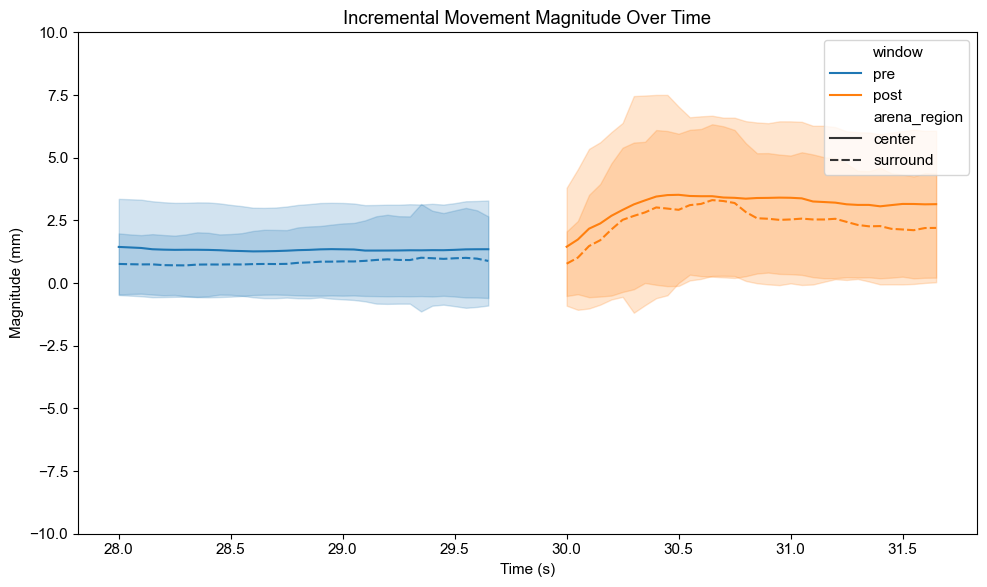

In [14]:
def compute_motion_metrics(sub_df, time_start, time_end, window_size=0.3, sampling_rate=0.05):
    # Subset for time window
    segment = sub_df[(sub_df['ts'] >= time_start) & (sub_df['ts'] < time_end)].copy()
    segment = segment.sort_values(by='ts')

    if len(segment) < 2:
        return None  # Skip if not enough points

    # Compute displacement vector
    start = segment.iloc[0][['x_norm', 'y_norm']].values
    end = segment.iloc[-1][['x_norm', 'y_norm']].values
    displacement_vec = end - start
    net_displacement = np.linalg.norm(displacement_vec)

    # Compute total path length
    coords = segment[['x_norm', 'y_norm']].values
    step_dists = np.linalg.norm(np.diff(coords, axis=0), axis=1)
    total_path_dist = step_dists.sum()

    # Deviation (0 = straight line, 1 = highly curved)
    deviation = (total_path_dist - net_displacement) / total_path_dist if total_path_dist != 0 else 0

    # Sliding window analysis
    time_points = np.arange(time_start, time_end - window_size, sampling_rate)
    sliding_angles = []
    sliding_mags = []

    for t in time_points:
        window = segment[(segment['ts'] >= t) & (segment['ts'] < t + window_size)]
        if len(window) > 1:
            p0 = window.iloc[0][['x_norm', 'y_norm']].values
            p1 = window.iloc[-1][['x_norm', 'y_norm']].values
            vec = p1 - p0
            angle = np.arctan2(vec[1], vec[0])
            mag = np.linalg.norm(vec)
            sliding_angles.append(angle)
            sliding_mags.append(mag)
        else:
            sliding_angles.append(np.nan)
            sliding_mags.append(np.nan)

    return {
        'net_displacement': net_displacement,
        'total_path_distance': total_path_dist,
        'deviation': deviation,
        'sliding_angles': sliding_angles,
        'sliding_mags': sliding_mags,
        'time_points': time_points
    }

motion_data = []

for (trial, fly), group in df.groupby(['file_path', 'fly']):
    for region in ['center', 'surround']:
        sub = group[group['arena_region'] == region]

        pre_metrics = compute_motion_metrics(sub, 28, 30)
        post_metrics = compute_motion_metrics(sub, 30, 32)

        if pre_metrics and post_metrics:
            motion_data.append({
                'file': trial,
                'fly': fly,
                'arena_region': region,
                'pre_deviation': pre_metrics['deviation'],
                'post_deviation': post_metrics['deviation'],
                'pre_sliding_mags': pre_metrics['sliding_mags'],
                'post_sliding_mags': post_metrics['sliding_mags'],
                'pre_time': pre_metrics['time_points'],
                'post_time': post_metrics['time_points']
            })

motion_df = pd.DataFrame(motion_data)


# Flatten data for seaborn
plot_data = []

for row in motion_data:
    for t, m in zip(row['pre_time'], row['pre_sliding_mags']):
        plot_data.append({
            'fly': row['fly'],
            'file': row['file'],
            'arena_region': row['arena_region'],
            'time': t,
            'magnitude': m,
            'window': 'pre'
        })
    for t, m in zip(row['post_time'], row['post_sliding_mags']):
        plot_data.append({
            'fly': row['fly'],
            'file': row['file'],
            'arena_region': row['arena_region'],
            'time': t,
            'magnitude': m,
            'window': 'post'
        })

plot_df = pd.DataFrame(plot_data)

# Plot
#sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=plot_df, x='time', y='magnitude',
             hue='window', style='arena_region',
             ci='sd', estimator='mean')
plt.title("Incremental Movement Magnitude Over Time")
plt.ylabel("Magnitude (mm)")
plt.xlabel("Time (s)")
plt.ylim(-10,10)
plt.tight_layout()
plt.show()


c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\LAB-JJ\Anaconda3\envs\manc_env\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

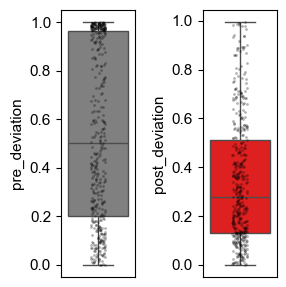

In [42]:

# Plot: pre vs post motion deviation
fig, ax = plt.subplots(1, 2, figsize=(3, 3))
sns.boxplot(
    data=motion_df,
    #x='arena_region',
    y='pre_deviation',
   # hue='arena_region',
    color='grey',
    ax=ax[0]
)
sns.stripplot(
    data=motion_df,
    #x='arena_region',
    y='pre_deviation',
    #hue='arena_region',
    
    ax=ax[0],
    dodge=True, size=2, alpha=0.3, color='black'
)

sns.boxplot(
    data=motion_df,
    #x='arena_region', 
    y='post_deviation',
    #hue='arena_region',
    color='red',
    ax=ax[1],
)

sns.stripplot(
    data=motion_df,
    #x='arena_region', 
    y='post_deviation',
    #hue='arena_region',
   
    ax=ax[1],
    dodge=True, size=2, alpha=0.3, color='black'
)

#plt.suptitle("Fly Movement Deviation (Pre vs Post)")
#ax[0].set_title("Pre (28–30s)") 
#ax[1].set_title("Post (30–32s)")
#ax[0].set_ylabel("Deviation (0 = straight, 1 = curved)")
#ax[1].set_ylabel("Deviation (0 = straight, 1 = curved)")
#ax[0].set_xlabel("Arena Region")
#ax[1].set_xlabel("Arena Region")
#plt.legend(title="Arena Region", loc='upper right', bbox_to_anchor=(1.2, 1))
ax[0].set_xticks([])
ax[1].set_xticks([])
plt.tight_layout()
plt.show()

In [43]:
fig.savefig(fig_path + 'fly_movement_straightness_deviance.svg', bbox_inches='tight', dpi=600, transparent=True)

In [19]:
def compute_cumulative_turning(sub_df, time_start, time_end, window_size=0.3, sampling_rate=0.05):
    # Filter only LED boundary encounter during post period
    led_encounters = sub_df[(sub_df['ts'] >= time_start) & 
                            (sub_df['ts'] < time_end) & 
                            (sub_df['pref'] == 1)].copy()
    led_encounters = led_encounters.sort_values(by='ts')

    if len(led_encounters) < 2:
        return None

    time_points = np.arange(time_start, time_end - window_size, sampling_rate)
    turning_angles = []

    for t in time_points:
        window = led_encounters[(led_encounters['ts'] >= t) & (led_encounters['ts'] < t + window_size)]
        if len(window) > 2:
            coords = window[['x_norm', 'y_norm']].values
            # Compute angle between successive vectors
            angles = []
            for i in range(1, len(coords)-1):
                a = coords[i] - coords[i-1]
                b = coords[i+1] - coords[i]
                angle = np.arctan2(b[1], b[0]) - np.arctan2(a[1], a[0])
                angle = np.mod(angle + np.pi, 2 * np.pi) - np.pi  # Wrap between -pi and pi
                angles.append(angle)
            cumulative_turn = np.nansum(angles)
            turning_angles.append(cumulative_turn)
        else:
            turning_angles.append(np.nan)

    return {
        'turning_angles': turning_angles,
        'time_points': time_points
    }


In [23]:
turning_data = []

for (trial, fly), group in df.groupby(['file_path', 'fly']):
    for region in ['center', 'surround']:
        sub = group[group['arena_region'] == region]

        turn_metrics = compute_cumulative_turning(sub, 30, 60)  # post-period

        if turn_metrics:
            for t, angle in zip(turn_metrics['time_points'], turn_metrics['turning_angles']):
                turning_data.append({
                    'file': trial,
                    'fly': fly,
                    'arena_region': region,
                    'time': t,
                    'cumulative_turn': angle,
                    'window': 'post'
                })

turning_df = pd.DataFrame(turning_data)


C:\Users\LAB-JJ\AppData\Local\Temp\ipykernel_8160\1146987936.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.lineplot(data=turning_df, x='time', y='cumulative_turn',


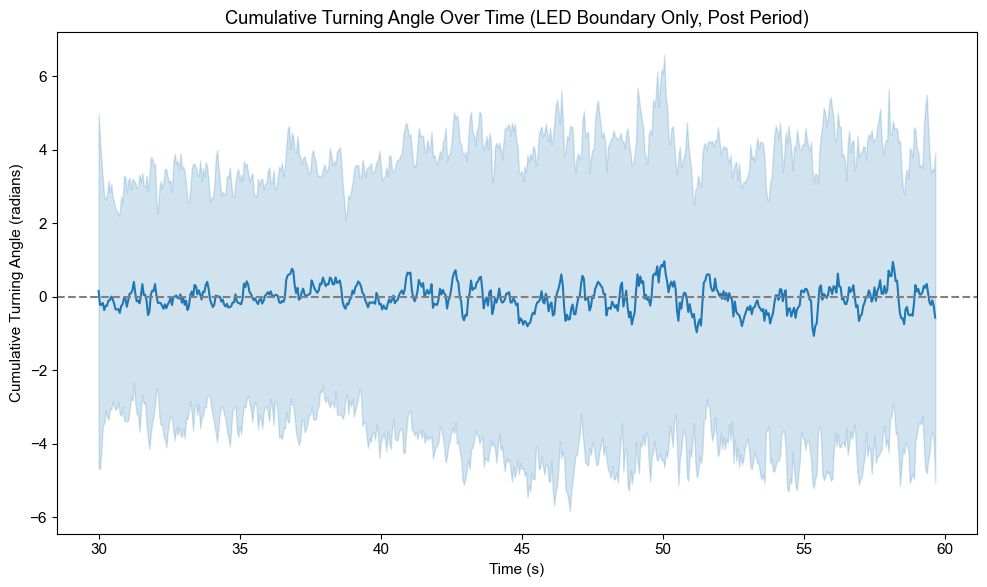

In [24]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=turning_df, x='time', y='cumulative_turn',
             ci='sd', estimator='mean')
plt.title("Cumulative Turning Angle Over Time (LED Boundary Only, Post Period)")
plt.ylabel("Cumulative Turning Angle (radians)")
plt.xlabel("Time (s)")
plt.axhline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


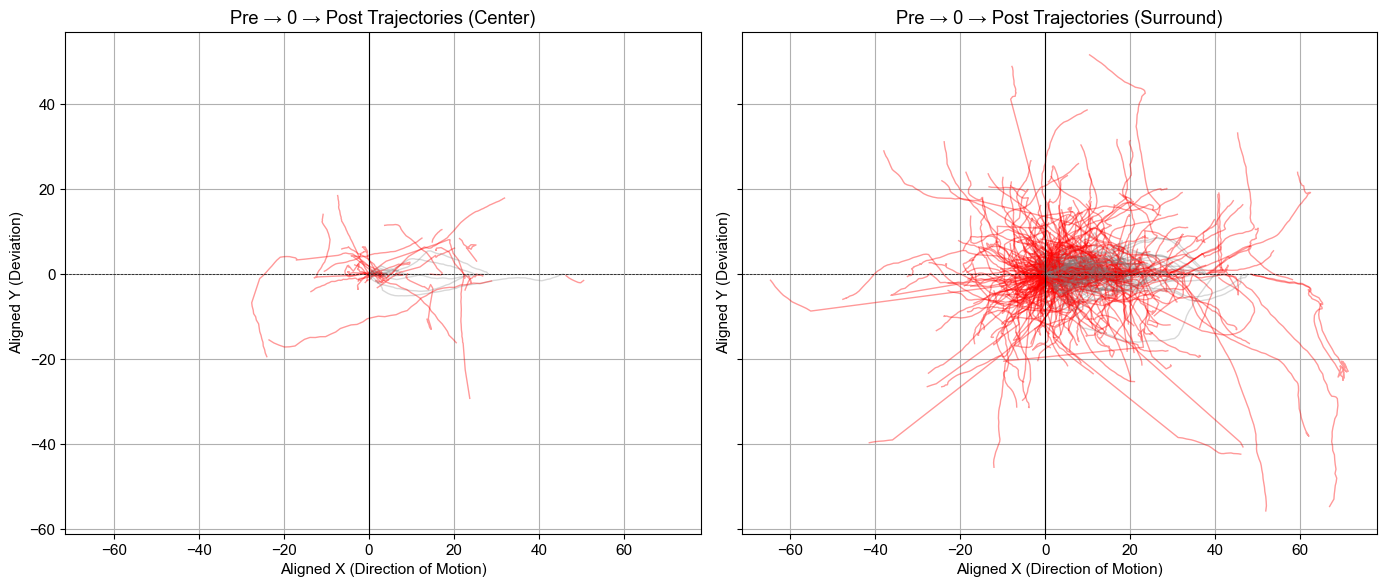

In [289]:
# --- Helper function ---
def rotate_coords(x, y, angle_rad):
    """Rotate x, y coordinates by -angle_rad to align direction rightward."""
    x_rot = x * np.cos(-angle_rad) - y * np.sin(-angle_rad)
    y_rot = x * np.sin(-angle_rad) + y * np.cos(-angle_rad)
    return x_rot, y_rot

# --- Set up plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
region_axes = {'center': axes[0], 'surround': axes[1]}

# Loop through each fly
for region in ['center', 'surround']:
    ax = region_axes[region]

    for (trial, fly), group in df.groupby(['file_path', 'fly']):
        sub = group[group['arena_region'] == region]
        if sub.empty:
            continue

        pre = sub[(sub['ts'] >= 28) & (sub['ts'] < 30)].sort_values('ts')
        post = sub[(sub['ts'] >= 30) & (sub['ts'] <= 32)].sort_values('ts')

        if len(pre) < 2 or len(post) < 2:
            continue

        # Determine alignment direction from pre
        start_pre = pre.iloc[0][['x_norm', 'y_norm']].values
        end_pre = pre.iloc[-1][['x_norm', 'y_norm']].values
        pre_vec = end_pre - start_pre
        angle_pre = np.arctan2(pre_vec[1], pre_vec[0])

        # Align pre to converge to 0
        pre_x = pre['x_norm'].values - end_pre[0]
        pre_y = pre['y_norm'].values - end_pre[1]
        pre_x_rot, pre_y_rot = rotate_coords(pre_x, pre_y, angle_pre)

        # Align post to diverge from 0
        post_x = post['x_norm'].values - start_pre[0]
        post_y = post['y_norm'].values - start_pre[1]
        post_x_rot, post_y_rot = rotate_coords(post_x, post_y, angle_pre)

        # Flip pre so it points toward origin
        ax.plot(-pre_x_rot, -pre_y_rot, color='gray', alpha=0.3, linewidth=1)
        ax.plot(post_x_rot, post_y_rot, color='red', alpha=0.4, linewidth=1)

    ax.set_title(f'Pre → 0 → Post Trajectories ({region.capitalize()})')
    ax.set_xlabel('Aligned X (Direction of Motion)')
    ax.set_ylabel('Aligned Y (Deviation)')
    ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
    ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()



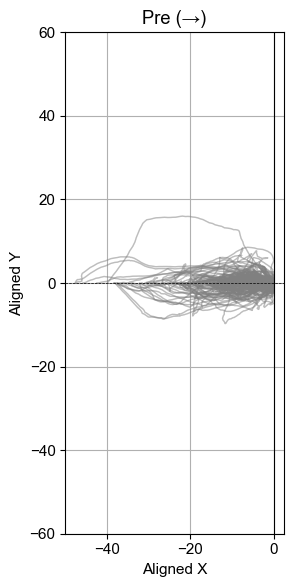

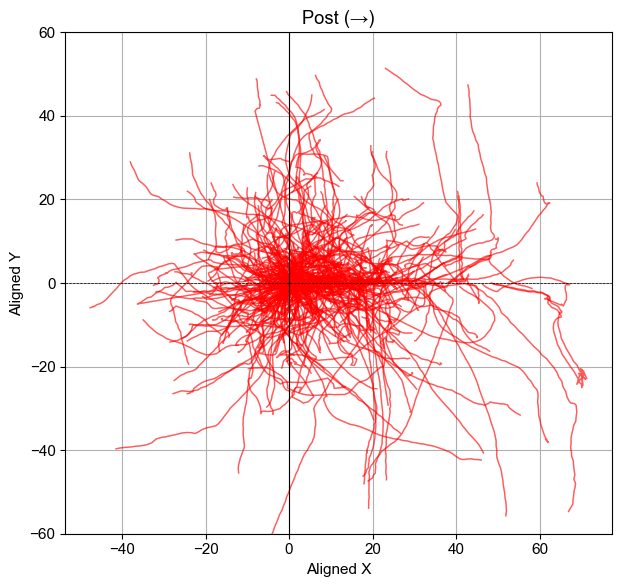

In [301]:
# --- Pre trajectories plot ---
fig_pre, ax_pre = plt.subplots(1, 1, figsize=(7, 6), sharex=True, sharey=True)

# --- Post trajectories plot ---
fig_post, ax_post = plt.subplots(1, 1, figsize=(7, 6), sharex=True, sharey=True)

for region in ['center', 'surround']:

    for (trial, fly), group in df.groupby(['file_path', 'fly']):
        sub = group
        if sub.empty:
            continue

        pre = sub[(sub['ts'] >= 28) & (sub['ts'] < 30)].sort_values('ts')
        post = sub[(sub['ts'] >= 30) & (sub['ts'] <= 32)].sort_values('ts')

        if len(pre) < 2 or len(post) < 2:
            continue

        # Pre vector for alignment
        start_pre = pre.iloc[0][['x_norm', 'y_norm']].values
        end_pre = pre.iloc[-1][['x_norm', 'y_norm']].values
        pre_vec = end_pre - start_pre
        angle_pre = np.arctan2(pre_vec[1], pre_vec[0])

        # Align pre to (0,0) from left
        pre_x = pre['x_norm'].values - end_pre[0]
        pre_y = pre['y_norm'].values - end_pre[1]
        pre_x_rot, pre_y_rot = rotate_coords(pre_x, pre_y, angle_pre)

        # Align post to start from (0,0) to right
        post_x = post['x_norm'].values - start_pre[0]
        post_y = post['y_norm'].values - start_pre[1]
        post_x_rot, post_y_rot = rotate_coords(post_x, post_y, angle_pre)

        # Plot pre and post
        ax_pre.plot(np.abs(pre_x_rot)*-1, pre_y_rot, color='gray', alpha=0.3, linewidth=1)
        ax_pre.set_ylim(-60, 60)
        ax_post.plot((post_x_rot), post_y_rot, color='red', alpha=0.4, linewidth=1)
        ax_post.set_ylim(-60, 60)

# Final styling
ax_pre.set_title(f'Pre (→)')
ax_pre.set_xlabel('Aligned X')
ax_pre.set_ylabel('Aligned Y')
ax_pre.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax_pre.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax_pre.set_aspect('equal')
ax_pre.grid(True)

ax_post.set_title(f'Post (→)')
ax_post.set_xlabel('Aligned X')
ax_post.set_ylabel('Aligned Y')
ax_post.axhline(0, color='black', linestyle='--', linewidth=0.5)
ax_post.axvline(0, color='black', linestyle='-', linewidth=0.8)
ax_post.set_aspect('equal')
ax_post.grid(True)

# Display plots
fig_pre.tight_layout()
fig_post.tight_layout()
plt.show()

In [296]:
fig_path

'C:/Users/LAB-JJ/Desktop/code/figs/'

In [302]:
fig_pre.savefig(fig_path + 'pre_trajectories.svg', dpi=600, bbox_inches='tight', transparent=True)
fig_post.savefig(fig_path + 'post_trajectories.svg', dpi=600, bbox_inches='tight', transparent=True)

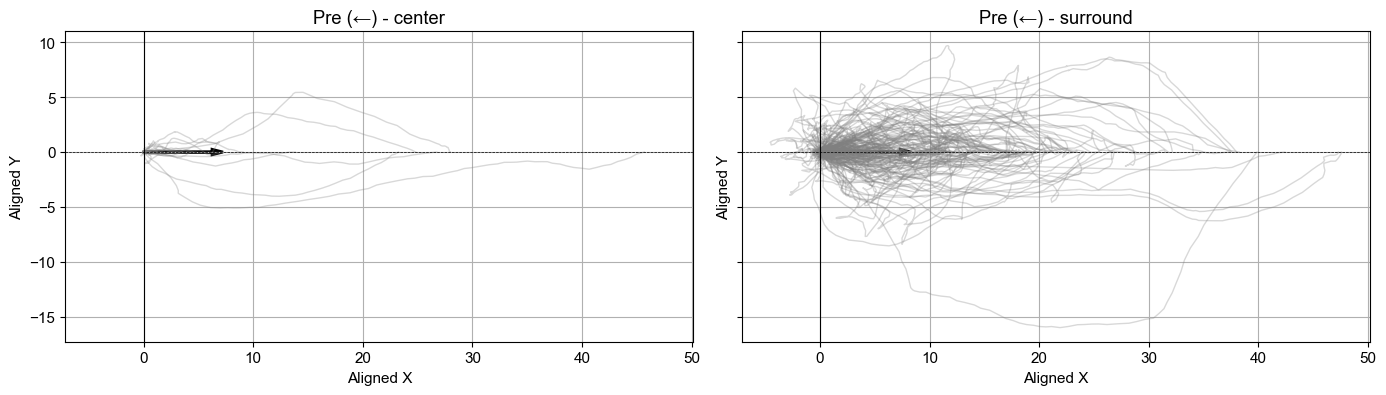

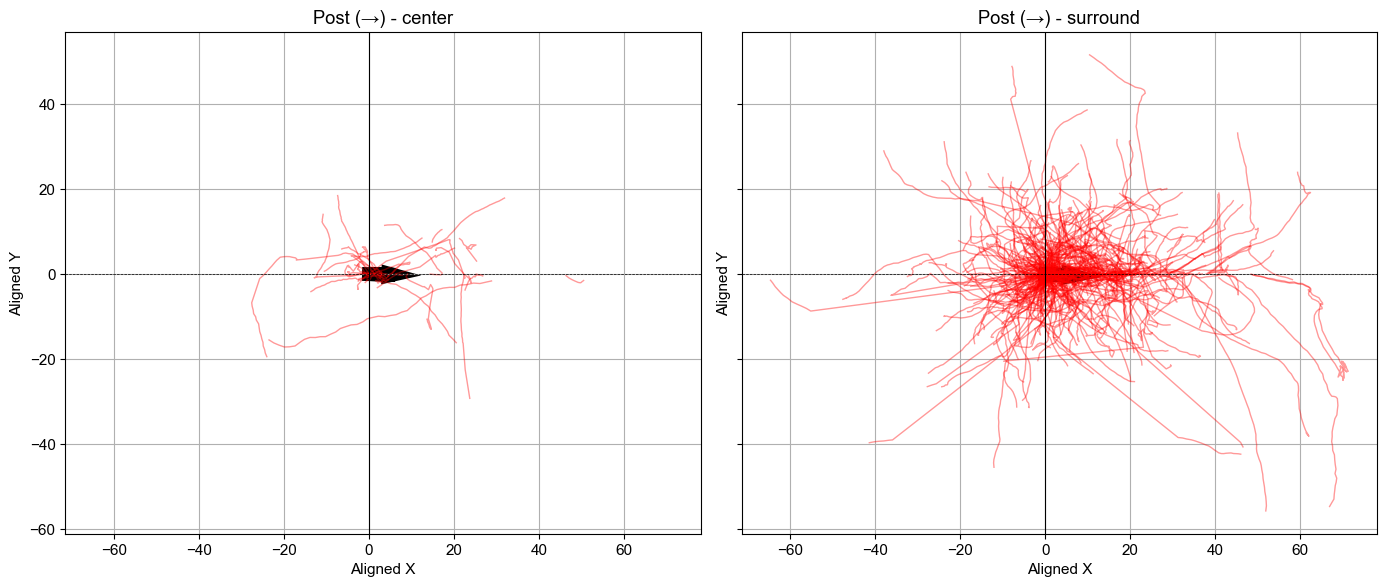

In [290]:
# Set up pre and post plots
fig_pre, axes_pre = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
fig_post, axes_post = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)
region_axes_pre = {'center': axes_pre[0], 'surround': axes_pre[1]}
region_axes_post = {'center': axes_post[0], 'surround': axes_post[1]}

for region in ['center', 'surround']:
    ax_pre = region_axes_pre[region]
    ax_post = region_axes_post[region]
    pre_ends = []
    post_ends = []

    for (trial, fly), group in df.groupby(['file_path', 'fly']):
        sub = group[group['arena_region'] == region]
        if sub.empty:
            continue

        pre = sub[(sub['ts'] >= 28) & (sub['ts'] < 30)].sort_values('ts')
        post = sub[(sub['ts'] >= 30) & (sub['ts'] <= 32)].sort_values('ts')

        if len(pre) < 2 or len(post) < 2:
            continue

        start_pre = pre.iloc[0][['x_norm', 'y_norm']].values
        end_pre = pre.iloc[-1][['x_norm', 'y_norm']].values
        pre_vec = end_pre - start_pre
        angle_pre = np.arctan2(pre_vec[1], pre_vec[0])

        # Align pre to (0,0) from left
        pre_x = pre['x_norm'].values - end_pre[0]
        pre_y = pre['y_norm'].values - end_pre[1]
        pre_x_rot, pre_y_rot = rotate_coords(pre_x, pre_y, angle_pre)
        ax_pre.plot(-pre_x_rot, -pre_y_rot, color='gray', alpha=0.3, linewidth=1)
        pre_ends.append((-pre_x_rot[0], -pre_y_rot[0]))

        # Align post from (0,0) to right
        post_x = post['x_norm'].values - start_pre[0]
        post_y = post['y_norm'].values - start_pre[1]
        post_x_rot, post_y_rot = rotate_coords(post_x, post_y, angle_pre)
        ax_post.plot(post_x_rot, post_y_rot, color='red', alpha=0.4, linewidth=1)
        post_ends.append((post_x_rot[-1], post_y_rot[-1]))

    # Mean pre direction arrow
    if pre_ends:
        pre_mean = np.mean(pre_ends, axis=0)
        ax_pre.arrow(0, 0, pre_mean[0], pre_mean[1],
                     head_width=0.5, head_length=1.0, fc='black', ec='black', linewidth=2, label='Mean Pre')

    # Mean post direction arrow
    if post_ends:
        post_mean = np.mean(post_ends, axis=0)
        ax_post.arrow(0, 0, post_mean[0], post_mean[1],
                      head_width=0.5, head_length=1.0, fc='black', ec='black', linewidth=10, label='Mean Post')

    # Final styling
    for ax, title in zip([ax_pre, ax_post], [f'Pre (←) - {region}', f'Post (→) - {region}']):
        ax.set_title(title)
        ax.set_xlabel('Aligned X')
        ax.set_ylabel('Aligned Y')
        ax.axhline(0, color='black', linestyle='--', linewidth=0.5)
        ax.axvline(0, color='black', linestyle='-', linewidth=0.8)
        ax.set_aspect('equal')
        ax.grid(True)

fig_pre.tight_layout()
fig_post.tight_layout()
plt.show()

In [221]:
post_mean

array([ 4.49177201, -2.38665549])